In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns

raw_data = pd.read_csv("/content/predictive_maintenance.csv")
df = raw_data

import ipywidgets as widgets
from IPython.display import display

# Function to update the interactive table based on the selected columns
def update_table(selected_columns):
    display(df[selected_columns])

# Get the list of columns from the DataFrame
all_columns = df.columns.tolist()

# Display the initial table with all columns
update_table(all_columns)

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

In [ ]:
df.info()  # Displaying information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


Difference between Process temperature and air temperature might be a indication of abnormal behaviour of CNC machine. Therefore a new column "Temperature difference [K]" was added.




In [ ]:
df["Temperature difference [K]"] = df["Process temperature [K]"] - df["Air temperature [K]"]
df.sample(4)

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
1011  1012     M15871    M                296.2                    307.3   
546    547     L47726    L                297.5                    309.4   
6446  6447     M21306    M                300.7                    310.3   
7698  7699     L54878    L                300.6                    311.5   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
1011                    1451         42.8               11       0   
546                     1809         24.3              110       0   
6446                    1471         40.2               59       0   
7698                    1419         38.6               31       0   

     Failure Type  Temperature difference [K]  
1011   No Failure                        11.1  
546    No Failure                        11.9  
6446   No Failure                         9.6  
7698   No Failure                        10.9

In [ ]:
df.describe().style.background_gradient(cmap="turbo")   # Generating a styled summary of the dataset

# **Check for missing values**

In [ ]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/82790)*100})
missing_data

total_missing  perc_missing
UDI                                     0           0.0
Product ID                              0           0.0
Type                                    0           0.0
Air temperature [K]                     0           0.0
Process temperature [K]                 0           0.0
Rotational speed [rpm]                  0           0.0
Torque [Nm]                             0           0.0
Tool wear [min]                         0           0.0
Target                                  0           0.0
Failure Type                            0           0.0
Temperature difference [K]              0           0.0

Since this is a synthetic dataset there are no missing values.

**Dropping 'UDI', 'Product ID'**

UDI and Product ID not informative for our ML algoriths. Therefore those two columns were removed.

In [ ]:
df = raw_data.drop(["UDI","Product ID"],axis=1)
all_columns = df.columns.tolist()
update_table(all_columns)

Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  Temperature difference [K]  
0      No Failure                        10.5  
1      No Failure                        10.5  
2      No Failure                        10.4  
3      No Failure                        10.4  
4      No Failure                        10.5  
...           ...                         ...  
9995   No Failure                         9.6  
9996   No Failure                         9.5  
9997   No Failure                         9.6  
9998   No Failure                         9.7  
9999   No Failure                         9.7  

[10000 rows x 9 columns]

In [ ]:
pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 35.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=151e9fc38de33f310070c195ff0bd4cf419496d60b90ac8a1ce81ff47e73ace7
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas_profiling

# Generate a Profile Report for the DataFrame
profile = pandas_profiling.ProfileReport(df)
profile

<ipython-input-8-431ccb7993e7>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: >

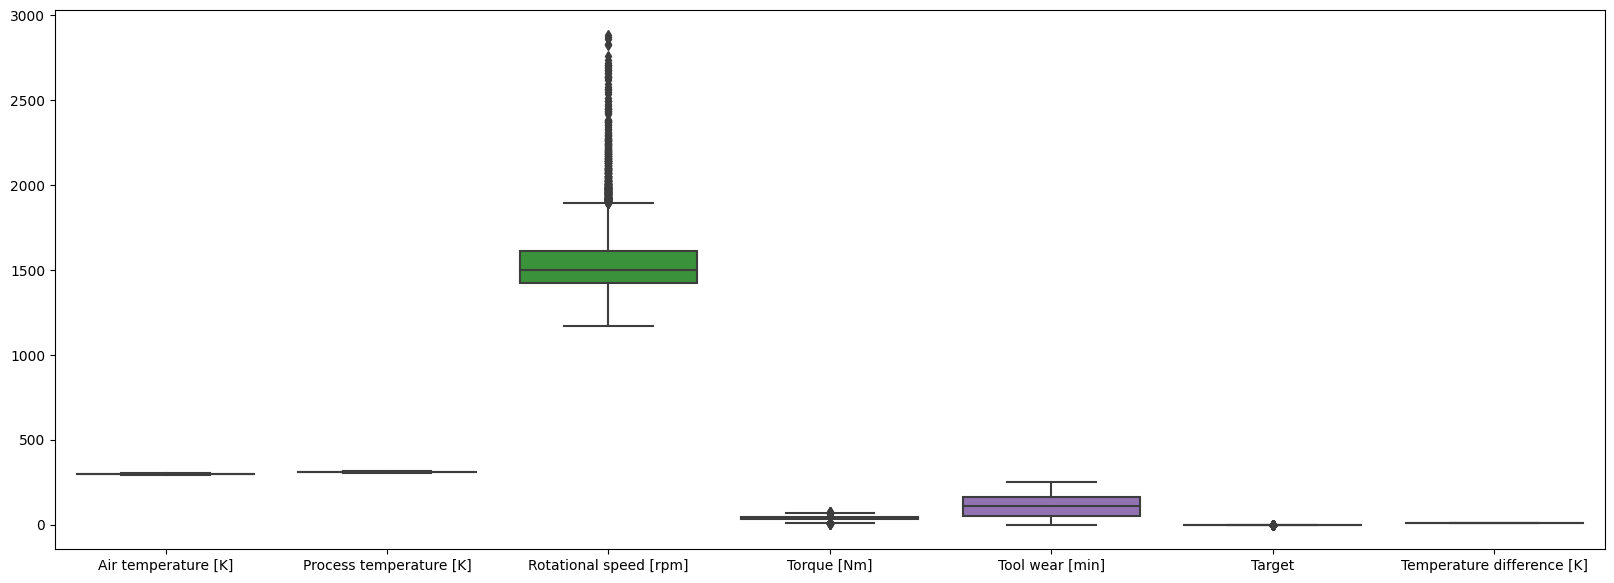

In [ ]:
# checking distribution and ranges of predictor variables
plt.figure(figsize=(20,7))
sns.boxplot(data = df)

**The above diagram shows that all the predictors are not in the same range.So, we should normalize the data.**

<font color="#1f77b4" size="+3">***Correlations***</font>

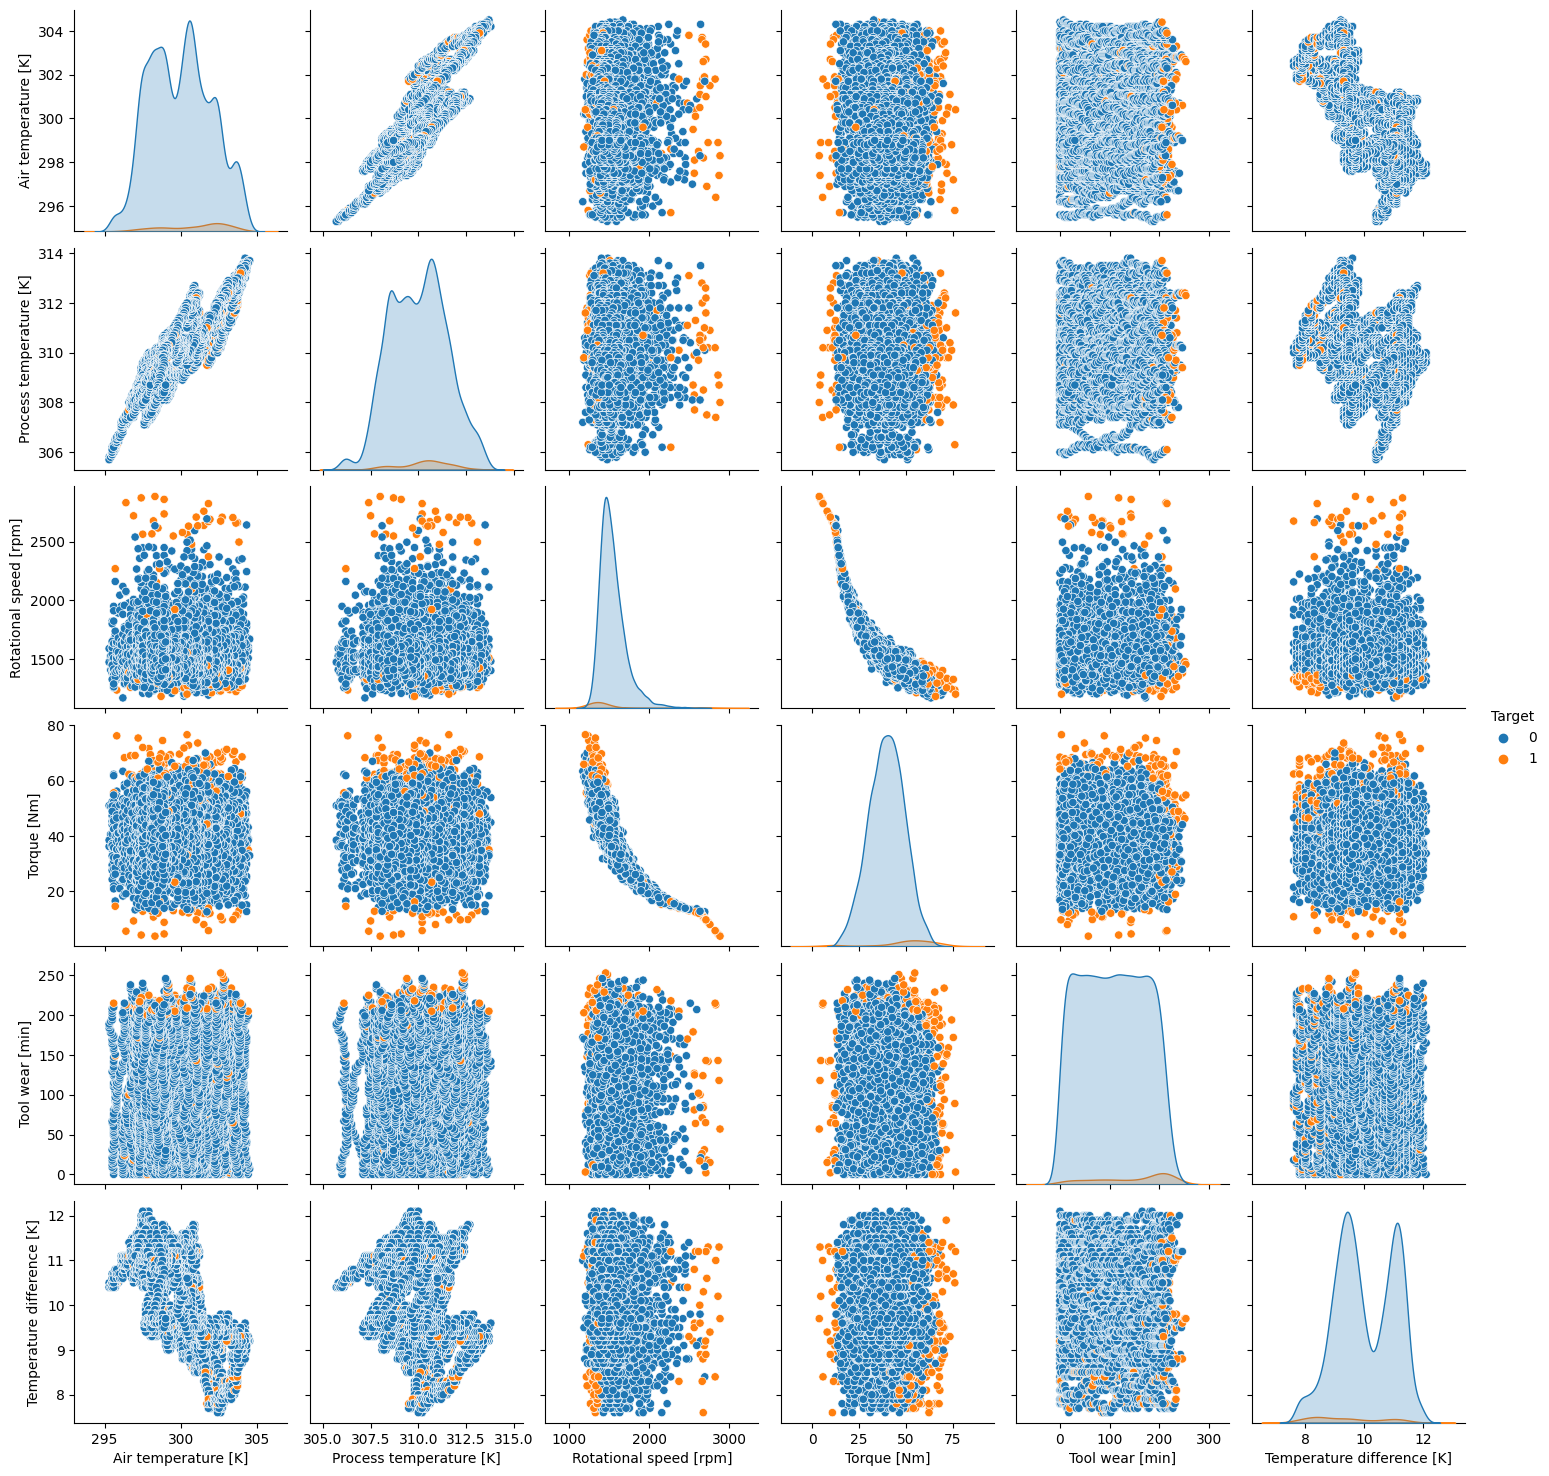

In [ ]:
sns.pairplot(df, hue = 'Target')
plt.show()

We can extract usefull information using these graph

* Torque vs Rotational speed graph - High torque or High rotational speed tends to CNC machine to fail

* High tool wear tennds machine to fail

#Heatmap

<ipython-input-11-182bbc67185e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


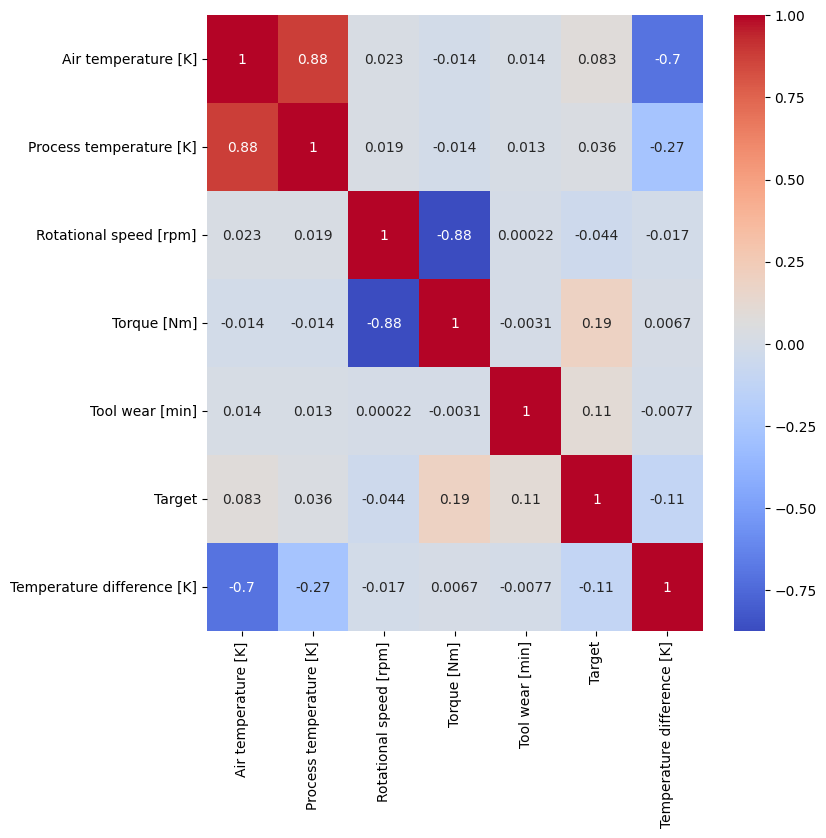

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

**There is high correlation between process temperature and air temperature, and between rotational speed and torque.**

<font color="#808080" size="+3">***Data Analysis***</font>

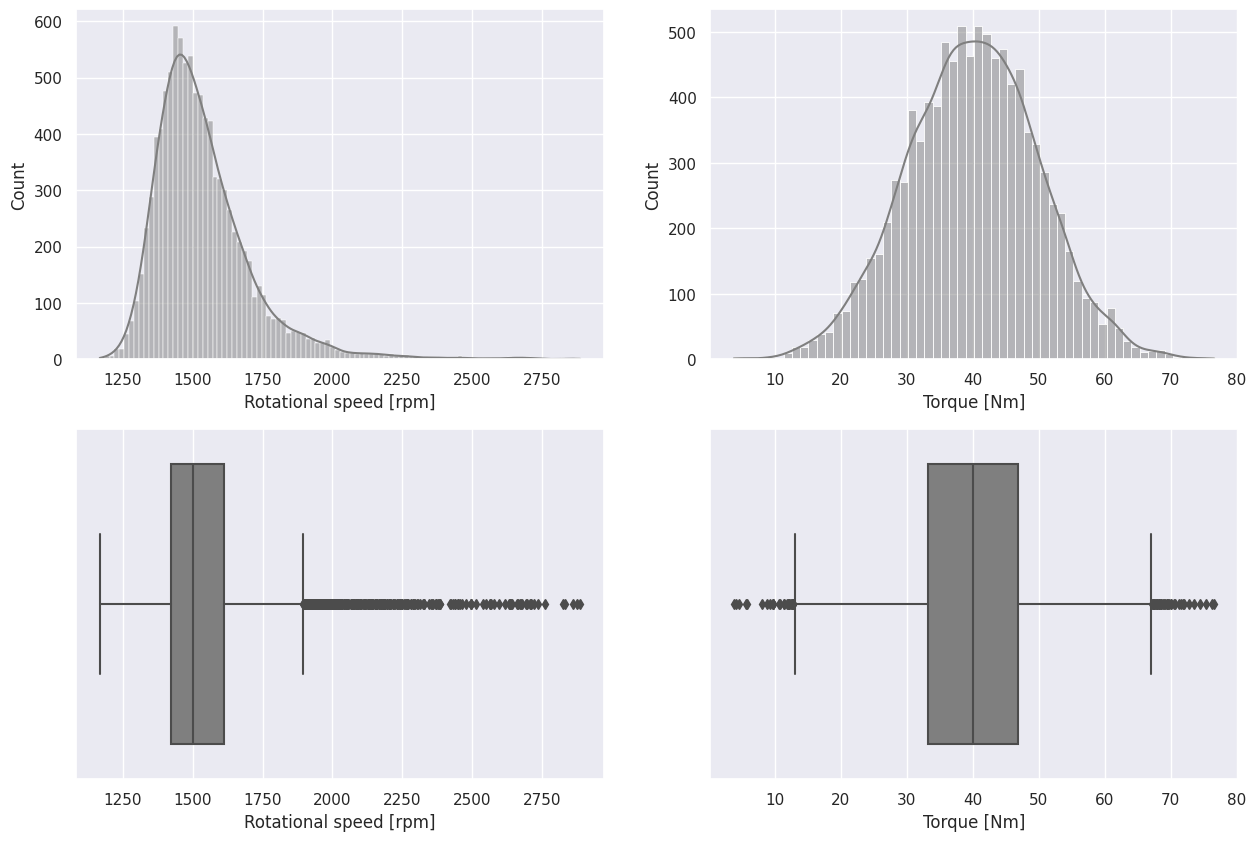

In [ ]:
sns.set_theme(style="darkgrid")
fig1, ax1 = plt.subplots(2, 2, figsize=(15,10))
sns.histplot(data=df, x='Rotational speed [rpm]', kde=True, ax=ax1[0,0],color='#7f7f7f')
sns.histplot(data=df, x='Torque [Nm]', kde=True, ax=ax1[0,1],color='#7f7f7f')
sns.boxplot(data=df, x='Rotational speed [rpm]', ax=ax1[1,0],color='#7f7f7f')
sns.boxplot(data=df, x='Torque [Nm]', ax=ax1[1,1],color='#7f7f7f')
plt.show()

<ipython-input-13-bf9973e93372>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df, x="Air temperature [K]", kde=True, bins=100, palette="magma", height=5, aspect=3.5);


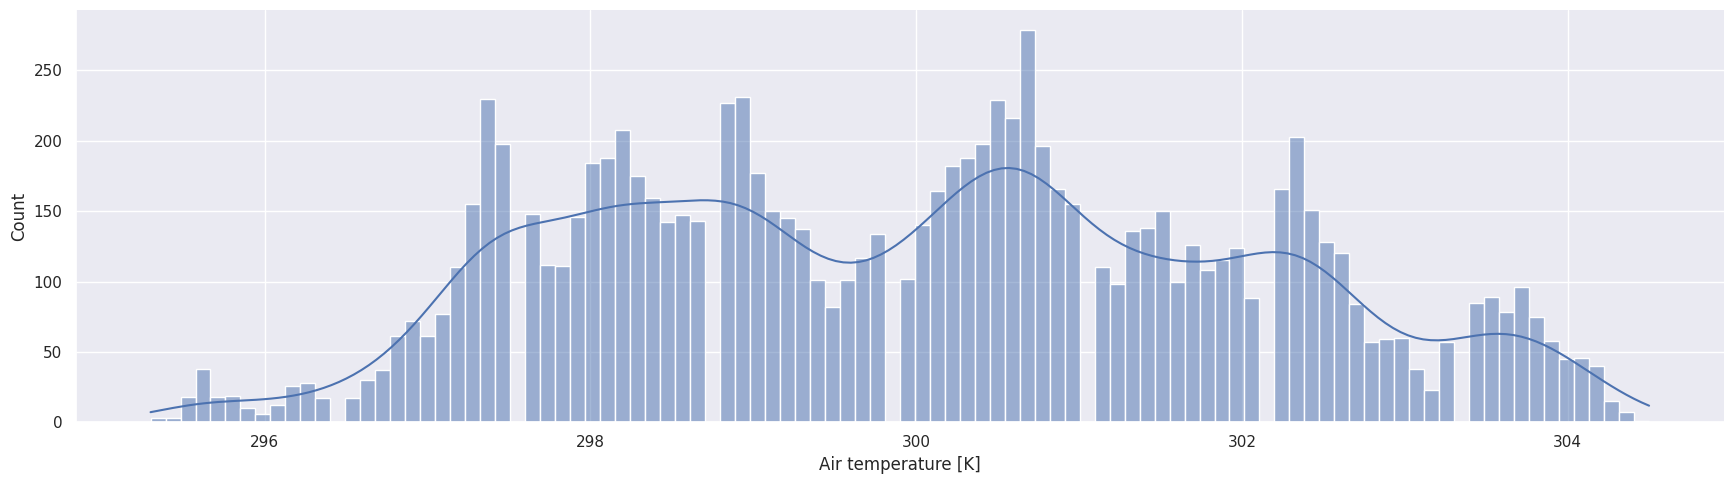

In [ ]:
sns.displot(data=df, x="Air temperature [K]", kde=True, bins=100, palette="magma", height=5, aspect=3.5);

<ipython-input-14-9058a109c6a1>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df, x="Process temperature [K]", kde=True, bins=100, palette="magma", height=5, aspect=3.5);


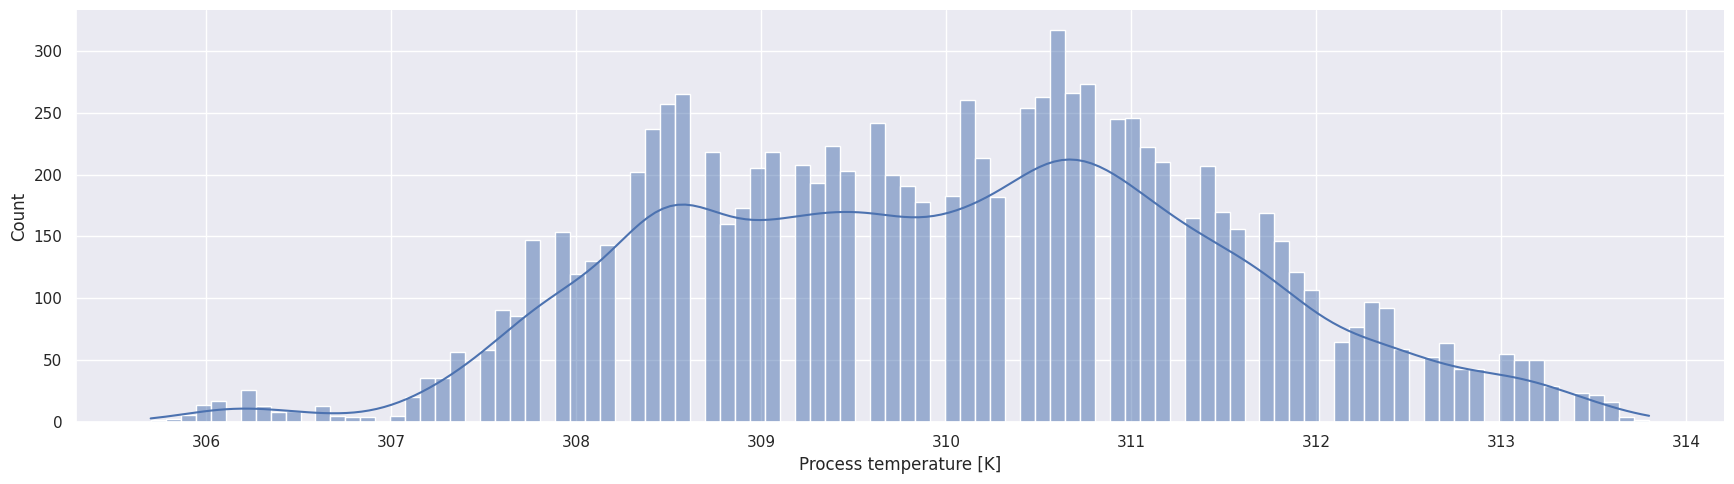

In [ ]:
sns.displot(data=df, x="Process temperature [K]", kde=True, bins=100, palette="magma", height=5, aspect=3.5);

<ipython-input-15-2145a0b0ce6d>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df, x="Temperature difference [K]", kde=True, bins=100, palette="magma", height=5, aspect=3.5);


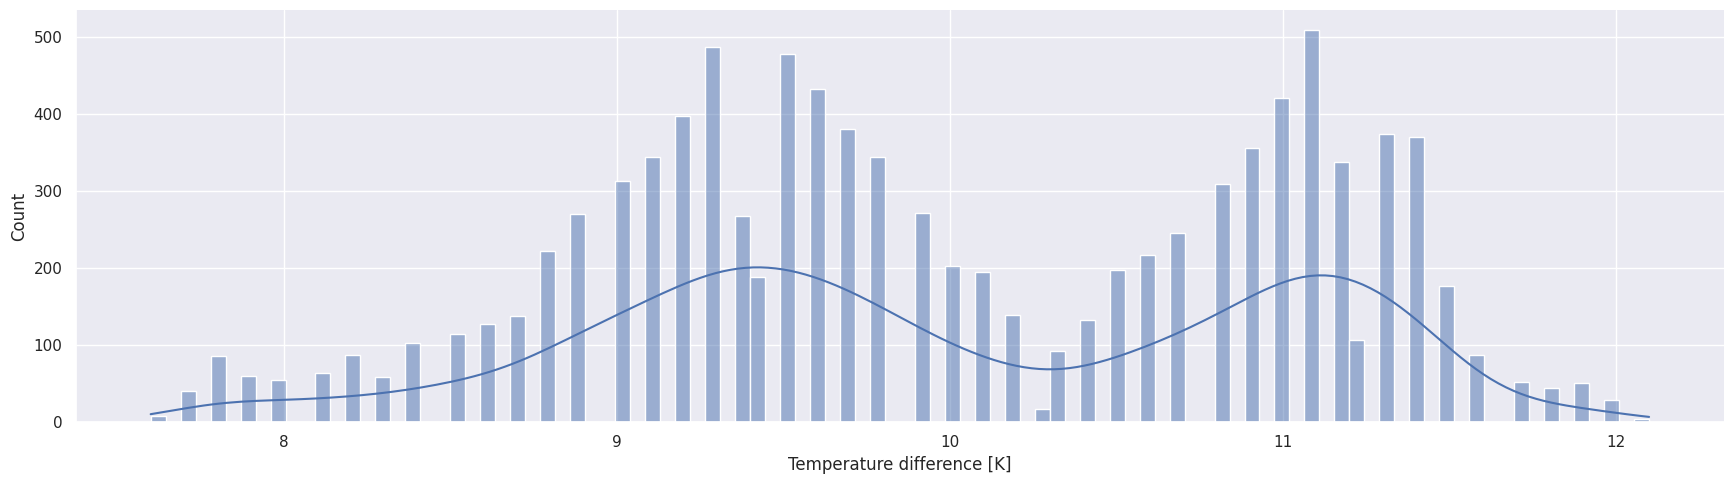

In [ ]:
sns.displot(data=df, x="Temperature difference [K]", kde=True, bins=100, palette="magma", height=5, aspect=3.5);

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'Failure Type' is a column in the DataFrame 'df'
failure_counts = df['Failure Type'].value_counts()

# Donut chart
fig_donut = go.Figure(go.Pie(
    labels=failure_counts.index,
    values=failure_counts.values,
    hole=0.4,
    textinfo='label+percent',
    insidetextorientation='radial'
))

fig_donut.update_layout(title='Failure Mode Distribution', showlegend=False)

# Table
fig_table = go.Figure(data=[go.Table(
    header=dict(values=["Failure Mode", "Count"]),
    cells=dict(values=[failure_counts.index, failure_counts.values])
)])

# Create subplots with shared y-axis
specs = [[{'type':'domain'}, {'type':'table'}]]
fig_combined = make_subplots(rows=1, cols=2, specs=specs, subplot_titles=["", "Failure Mode Counts"])

# Add the donut chart and table to the combined figure
fig_combined.add_trace(fig_donut.data[0], row=1, col=1)
fig_combined.add_trace(fig_table.data[0], row=1, col=2)

# Update the layout of the combined figure
fig_combined.update_layout(height=500, showlegend=False)

fig_combined.show()


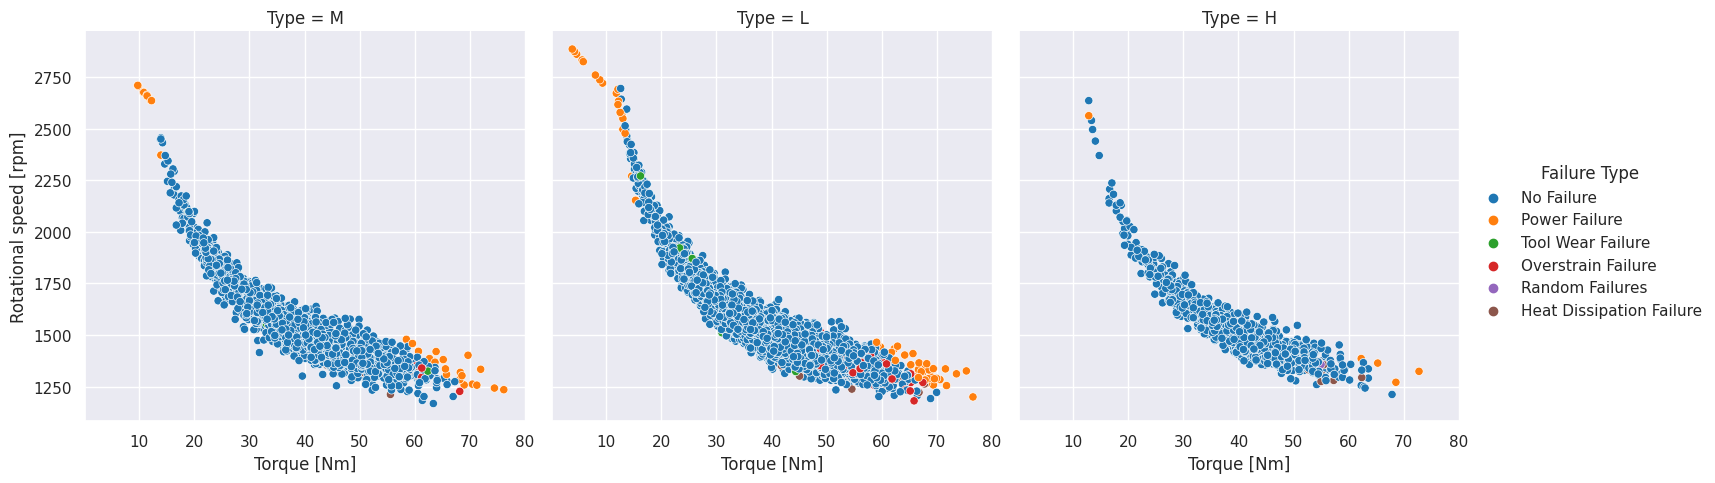

In [ ]:
sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",col="Type",palette='tab10');

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++





 It was transformed the categorical labels in the 'Failure Type' column & "Type" column of the DataFrame df into numerical values. Label encoding is a technique used to represent categorical data as integers, which is useful for various machine learning algorithms that require numerical inputs.

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['Type'] = LabelEncoder().fit_transform(df['Type'])

In [ ]:
df.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2                298.1                    308.6                    1551   
1     1                298.2                    308.7                    1408   
2     1                298.1                    308.5                    1498   
3     1                298.2                    308.6                    1433   
4     1                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Failure Type  \
0         42.8                0       0   No Failure   
1         46.3                3       0   No Failure   
2         49.4                5       0   No Failure   
3         39.5                7       0   No Failure   
4         40.0                9       0   No Failure   

   Temperature difference [K]  
0                        10.5  
1                        10.5  
2                        10.4  
3                        10.4  
4                        10.5

In [ ]:
df['Failure Type'] = LabelEncoder().fit_transform(df['Failure Type'])

In [ ]:
df

Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     0                298.9                    308.4   
9997     2                299.0                    308.6   
9998     0                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

      Failure Type  Temperature difference [K]  
0                1                        10.5  
1                1                        10.5  
2                1                        10.4  
3                1                        10.4  
4                1                        10.5  
...            ...                         ...  
9995             1                         9.6  
9996             1                         9.5  
9997             1                         9.6  
9998             1                         9.7  
9999             1                         9.7  

[10000 rows x 9 columns]

-----------------------------------------------------------------------

#Train, Validation & Test the data set

In [ ]:
X = df.drop(columns=["Failure Type", "Target"], axis=1)
y = df["Failure Type"]

<font color="#FFFF00" size="+1">After executing this line of code, the feature matrix 'X' will be standardized, and each column of X will have zero mean and unit variance. Standardizing the features is often a good practice, especially when using algorithms like support vector machines (SVM), k-nearest neighbors (KNN), or neural networks, as it can improve the performance and stability of the models</font>

In [ ]:
#X = StandardScaler().fit_transform(X)
#X

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [ ]:
#def scale_dataset(dataframe, oversample=False):
  #x = dataframe[dataframe.columns[:-1]].values
  #y = dataframe[dataframe.columns[-1]].values

  #scaler = StandardScaler()
  #x = scaler.fit_transform(x)

  #if oversample:
    #ros = RandomOverSampler()
    #x, y = ros.fit_resample(x, y)

  #data = np.hstack((x, np.reshape(y, (-1, 1))))

  #return data, x, y

In [ ]:
#train, x_train, y_train = scale_dataset(train, oversample=True)
#valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
#test, x_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
X_train

Type  Air temperature [K]  Process temperature [K]  \
4199     2                302.5                    311.1   
757      1                296.9                    308.1   
4001     0                302.1                    311.2   
8163     1                299.7                    311.1   
4250     1                302.6                    311.0   
...    ...                  ...                      ...   
1293     0                298.7                    309.8   
4023     1                302.1                    311.0   
7259     2                300.4                    310.5   
5200     1                303.8                    312.8   
3775     0                302.5                    311.1   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  \
4199                    1638         32.0              198   
757                     1555         33.7              229   
4001                    1598         37.9              148   
8163                    1574         36.4              135   
4250                    1660         38.0               99   
...                      ...          ...              ...   
1293                    1582         33.4              121   
4023                    1364         50.0              205   
7259                    1500         43.0                9   
5200                    1416         58.7              156   
3775                    1850         23.3              203   

      Temperature difference [K]  
4199                         8.6  
757                         11.2  
4001                         9.1  
8163                        11.4  
4250                         8.4  
...                          ...  
1293                        11.1  
4023                         8.9  
7259                        10.1  
5200                         9.0  
3775                         8.6  

[8000 rows x 7 columns]

#Machine Learning Algorithms

Machine learning algorithms are computational techniques that allow computers to learn patterns and relationships from data without being explicitly programmed for them. These algorithms can be broadly categorized into three main types based on the learning paradigm: supervised learning, unsupervised learning, and reinforcement learning.In our case we mainly used supervised learning algorithms.


* Support Vector Machine

* Random Forest
* Decision Tree
* CatBoost
*XgBoost
*K-Nearest Neighbor(KNN)
*Gradient Boosting Classifier
*Logistic Regression
* Deep Neural Network


#Hyperparameter tuning


Hyperparameters are parameters that are not learned directly from the training data during the training process of a machine learning model. Instead, they are set before the training begins and control the learning process. These parameters influence how the model is trained and how it makes predictions but are not updated through the model's learning process.

The process of training a machine learning model involves finding the best values for the model's hyperparameters, which can significantly impact the model's performance and generalization ability. The selection of appropriate hyperparameters is essential to ensure that the model performs well on new, unseen data and does not overfit or underfit the training data.

Some common examples of hyperparameters in various machine learning algorithms
* Learning Rate (Gradient Descent-based algorithms): The step size at which the model updates its parameters during training

* Number of Hidden Units (Neural Networks): The number of neurons in each layer of a neural network.
* Number of Trees (Random Forest): The number of decision trees in a random forest ensemble.
* Maximum Tree Depth (Decision Trees): The maximum depth allowed for a decision tree.
*Kernel Type and Kernel Parameters (Support Vector Machines): The type of kernel function and its associated parameters used to transform data into a higher-dimensional space.
*Number of Clusters (Clustering Algorithms): The number of clusters to be formed by the clustering algorithm.


GridSearchCV : takes a model and a grid of hyperparameter values as input. It then trains the model with each combination of hyperparameters in the grid and evaluates the model's performance on a held-out set of data. The combination of hyperparameters that produces the best model is then returned.

RandomizedSearchCV : takes a model and a grid of hyperparameter values as input. It then trains the model with a random subset of the hyperparameters in the grid and evaluates the model's performance on a held-out set of data. The combination of hyperparameters that produces the best model is then returned.

Bayesian optimization: It is a sequential model-based optimization algorithm for global optimization of black-box functions. It works by building a probabilistic model of the objective function and then using that model to select the next set of hyperparameters to evaluate. It is a more sophisticated approach to hyperparameter tuning than GridSearchCV or RandomizedSearchCV. It can find the best hyperparameters more quickly and reliably. However, it can also be more computationally expensive

#Hyperparameter tuning frameworks
 Hyperparameter tuning frameworks are tools that automate the process of finding the optimal values for the hyperparameters of a machine learning model. They can be used to improve the accuracy, performance, and reproducibility of machine learning models. Basically two hyperparameter tuning framworks were used in this projects.

* Scikit-learn
* Optuna

In [ ]:
import time

#Support Vector Machine

Normal Model Training

In [ ]:
 #Support Vector Machines

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
svc = SVC()
start_time_train = time.time()
svc.fit(X_train, y_train)
end_time_train = time.time()
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 4)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 4)
time_to_train = end_time_train - start_time_train

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("Time to train the model:", time_to_train, "seconds")

print("\033[1;31m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1;31m--------------------------------------------------------\033[0m")
#plot_confusion_matrix(svc, X_test, y_test);


Training Accuracy    : 96.75 %
Model Accuracy Score : 96.45 %
Time to train the model: 0.24657368659973145 seconds
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.96      1.00      0.98      1927
           2       0.00      0.00      0.00        16
           3       0.75      0.17      0.27        18
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         9

    accuracy                           0.96      2000
   macro avg       0.29      0.19      0.21      2000
weighted avg       0.94      0.96      0.95      2000

--------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Hyperparameter tuning of svm using GridSearchCV

In [ ]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

# Step 2: Define hyperparameters and their values to search over
param_grid = {
    'C': [0.1, 1, 10],              # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Kernel type ('linear' or 'rbf')
    'gamma': ['scale', 'auto'],     # Kernel coefficient for 'rbf'
}

# Step 3: Create an instance of GridSearchCV
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Step 4: Fit the GridSearchCV instance on the training data and measure time
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time

# Step 5: Print the best hyperparameters and corresponding accuracy score
best_params = grid_search.best_params_
best_accuracy = round(grid_search.best_score_ * 100, 2)

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score :", best_accuracy, "%")
print("Total Time Taken    :", round(total_time, 2), "seconds")
print("\033[1;31m--------------------------------------------------------\033[0m")

# Refit the model on the full training data using the best hyperparameters and measure time
best_svc = grid_search.best_estimator_
start_time = time.time()
best_svc.fit(X_train, y_train)

# Evaluate the model on the test data and measure time
y_pred_best = best_svc.predict(X_test)
best_svc_accuracy = round(accuracy_score(y_pred_best, y_test) * 100, 4)
end_time = time.time()
total_time = end_time - start_time

print("Best Model Training Accuracy:", round(best_svc.score(X_train, y_train) * 100, 4), "%")
print("Best Model Test Accuracy    :", best_svc_accuracy, "%")
print("Total Time Taken for Training and Prediction:", round(total_time, 2), "seconds")
print("\033[1;31m--------------------------------------------------------\033[0m")
print("Best Model Classification Report: \n", classification_report(y_test, y_pred_best))


Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy Score : 98.17 %
Total Time Taken    : 533.75 seconds
--------------------------------------------------------
Best Model Training Accuracy: 98.3625 %
Best Model Test Accuracy    : 97.6 %
Total Time Taken for Training and Prediction: 17.21 seconds
--------------------------------------------------------
Best Model Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.59      0.70        22
           1       0.98      0.99      0.99      1927
           2       0.61      0.69      0.65        16
           3       0.75      0.67      0.71        18
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         9

    accuracy                           0.98      2000
   macro avg       0.53      0.49      0.51      2000
weighted avg       0.97      0.98      0.97      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Confusion matrix for best predicted lables from Hyperparameter tuning of svm using GridSearchCV and true lables.

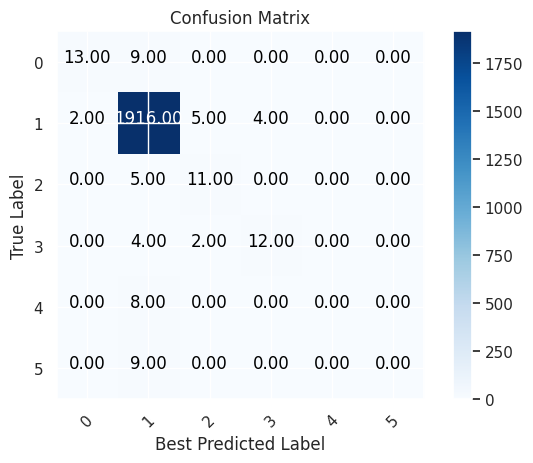

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_best are true labels and best predicted labels, respectively
cm = confusion_matrix(y_test, y_pred_best)
# Assuming classes is a list containing the class names in the order of the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ["0","1", "2", "3","4","5"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f'  # Format to display the numerical values inside the matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Best Predicted Label')
plt.tight_layout()
plt.show()


First we directly use GridSearchCV to tune hyperparameters and accurecy increased  96.45 % to 97.60 %.

Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create the SVM model with the best parameters
best_params = {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
model = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

# Step 4: Perform cross-validation and get predictions
num_folds = 5
predicted_labels = cross_val_predict(model, X_train, y_train, cv=num_folds)

# Step 5: Calculate evaluation metrics
accuracy = accuracy_score(y_train, predicted_labels)
precision = precision_score(y_train, predicted_labels, average='weighted')
recall = recall_score(y_train, predicted_labels, average='weighted')
f1 = f1_score(y_train, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(y_train, predicted_labels)

print(f"Cross-validated Accuracy: {accuracy}")
print(f"Cross-validated Precision: {precision}")
print(f"Cross-validated Recall: {recall}")
print(f"Cross-validated F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

# Step 6: Train the model on the entire training set and test it on the test set
model.fit(X_train, y_train)
test_predictions = model.predict(X_test)

# Step 7: Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')
test_conf_matrix = confusion_matrix(y_test, test_predictions)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1-score: {test_f1}")
print("Test Confusion Matrix:")
print(test_conf_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Cross-validated Accuracy: 0.980375
Cross-validated Precision: 0.9738927001482323
Cross-validated Recall: 0.980375
Cross-validated F1-score: 0.9769286349688149
Confusion Matrix:
[[  57   38    2    0    0    0]
 [  15 7681   11   10    0    0]
 [   1   19   45    0    0    0]
 [   0   13    2   60    0    0]
 [   0   12    0    0    0    0]
 [   0   33    1    0    0    0]]
Test Accuracy: 0.981
Test Precision: 0.9716837672281776
Test Recall: 0.981
Test F1-score: 0.9757793756776807
Test Confusion Matrix:
[[   5   10    0    0    0    0]
 [   2 1929    2    2    0    0]
 [   0    3   10    0    0    0]
 [   0    2    0   18    0    0]
 [   0    6    0    0    0    0]
 [   0    9    2    0    0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Test accuracy 99.55%.

#Random Forest

Normal Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 4)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 4)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 100.0 %
Model Accuracy Score : 98.3 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.99      1.00      0.99      1935
           2       1.00      0.46      0.63        13
           3       0.74      0.70      0.72        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.98      2000
   macro avg       0.60      0.53      0.55      2000
weighted avg       0.97      0.98      0.98      2000

--------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Hyperparameter tuning of Random Forest using GridSearchCV

In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Define hyperparameters and their values to search over
param_grid = {
    'n_estimators': [50, 100, 150],    # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
}

# Step 3: Create an instance of GridSearchCV
rfc = RandomForestClassifier()
grid_search = GridSearchCV(rfc, param_grid, cv=5)

# Step 4: Fit the GridSearchCV instance on the training data and measure time
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time

# Step 5: Print the best hyperparameters and corresponding accuracy score
best_params = grid_search.best_params_
best_accuracy = round(grid_search.best_score_ * 100, 2)

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score :", best_accuracy, "%")
print("Total Time Taken    :", round(total_time, 2), "seconds")
print("\033[1m--------------------------------------------------------\033[0m")

# Refit the model on the full training data using the best hyperparameters and measure time
best_rfc = grid_search.best_estimator_
start_time = time.time()
best_rfc.fit(X_train, y_train)


# Evaluate the model on the test data and measure time
y_pred_best = best_rfc.predict(X_test)
best_rfc_accuracy = round(accuracy_score(y_pred_best, y_test) * 100, 4)
end_time = time.time()
total_time = end_time - start_time

print("Best Model Training Accuracy:", round(best_rfc.score(X_train, y_train) * 100, 4), "%")
print("Best Model Test Accuracy    :", best_rfc_accuracy, "%")
print("Total Time Taken for Training and Prediction:", round(total_time, 2), "seconds")
print("\033[1m--------------------------------------------------------\033[0m")
print("Best Model Classification Report: \n", classification_report(y_test, y_pred_best))


Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy Score : 98.4 %
Total Time Taken    : 101.11 seconds
--------------------------------------------------------
Best Model Training Accuracy: 99.9625 %
Best Model Test Accuracy    : 98.3 %
Total Time Taken for Training and Prediction: 0.45 seconds
--------------------------------------------------------
Best Model Classification Report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.99      1.00      0.99      1935
           2       0.89      0.62      0.73        13
           3       0.72      0.65      0.68        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.98      2000
   macro avg       0.58      0.54      0.56      2000
weighted avg       0.97      0.98      0.98      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Confusion Matrix

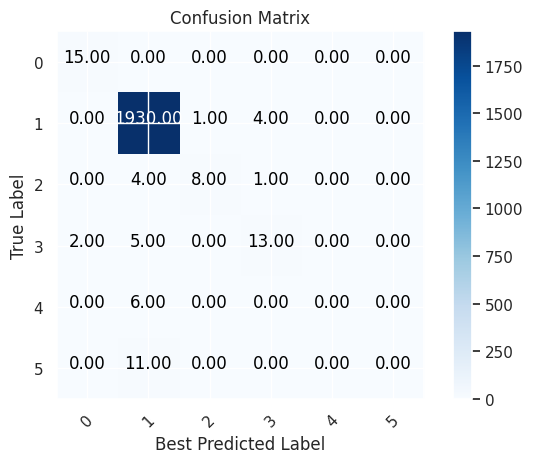

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_best are true labels and best predicted labels, respectively
cm = confusion_matrix(y_test, y_pred_best)
# Assuming classes is a list containing the class names in the order of the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ["0","1", "2", "3","4","5"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f'  # Format to display the numerical values inside the matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Best Predicted Label')
plt.tight_layout()
plt.show()

Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.ensemble import RandomForestClassifier  # For classification tasks
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create the Random Forest model with the best parameters
best_params = {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
model = RandomForestClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42)

# Step 4: Perform cross-validation and get predictions
num_folds = 5
predicted_labels = cross_val_predict(model, X_train, y_train, cv=num_folds)

# Step 5: Calculate evaluation metrics
accuracy = accuracy_score(y_train, predicted_labels)
precision = precision_score(y_train, predicted_labels, average='weighted')
recall = recall_score(y_train, predicted_labels, average='weighted')
f1 = f1_score(y_train, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(y_train, predicted_labels)

print("\033[1;31m--------------------------------------------------------\033[0m")
print(f"Cross-validated Accuracy: {accuracy}")
print(f"Cross-validated Precision: {precision}")
print(f"Cross-validated Recall: {recall}")
print(f"Cross-validated F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

# Step 6: Train the model on the entire training set and test it on the test set
model.fit(X_train, y_train)
test_predictions = model.predict(X_test)

# Step 7: Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')
test_conf_matrix = confusion_matrix(y_test, test_predictions)

print("\033[1;31m--------------------------------------------------------\033[0m")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1-score: {test_f1}")
print("Test Confusion Matrix:")
print(test_conf_matrix)

# Additional classification report
print("\033[1;31m--------------------------------------------------------\033[0m")
print("Test Classification Report:")
print(classification_report(y_test, test_predictions))
print("\033[1;31m--------------------------------------------------------\033[0m")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



--------------------------------------------------------
Cross-validated Accuracy: 0.982625
Cross-validated Precision: 0.9758846091234584
Cross-validated Recall: 0.982625
Cross-validated F1-score: 0.9785733800997599
Confusion Matrix:
[[  88    8    0    1    0    0]
 [   5 7700    3    8    0    1]
 [   1   37   25    2    0    0]
 [   2   22    3   48    0    0]
 [   0   12    0    0    0    0]
 [   0   33    1    0    0    0]]
--------------------------------------------------------
Test Accuracy: 0.982
Test Precision: 0.9734637671811669
Test Recall: 0.982
Test F1-score: 0.9773342167607133
Test Confusion Matrix:
[[  15    0    0    0    0    0]
 [   2 1929    0    4    0    0]
 [   0    5    7    1    0    0]
 [   2    5    0   13    0    0]
 [   0    6    0    0    0    0]
 [   0   10    1    0    0    0]]
--------------------------------------------------------
Test Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

#Decision Tree

Normal Model Training

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 4)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 4)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1;31m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1;31m--------------------------------------------------------\033[0m")


Training Accuracy    : 100.0 %
Model Accuracy Score : 96.95 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.99      0.98      0.98      1935
           2       0.47      0.62      0.53        13
           3       0.73      0.80      0.76        20
           4       0.00      0.00      0.00         6
           5       0.07      0.09      0.08        11

    accuracy                           0.97      2000
   macro avg       0.53      0.58      0.55      2000
weighted avg       0.97      0.97      0.97      2000

--------------------------------------------------------


Hyperparameter tuning of Decision Tree using GridSearchCV

In [ ]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Step 2: Define hyperparameters and their values to search over
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting ('gini' or 'entropy')
    'max_depth': [None, 5, 10, 20],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split an internal node
}

# Step 3: Create an instance of GridSearchCV
dt_classifier = DecisionTreeClassifier()
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)

# Step 4: Fit the GridSearchCV instance on the training data and measure time
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time

# Step 5: Print the best hyperparameters and corresponding accuracy score
best_params = grid_search.best_params_
best_accuracy = round(grid_search.best_score_ * 100, 2)

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score :", best_accuracy, "%")
print("Total Time Taken    :", round(total_time, 2), "seconds")
print("\033[1m--------------------------------------------------------\033[0m")

# Refit the model on the full training data using the best hyperparameters and measure time
best_dt_classifier = grid_search.best_estimator_
start_time = time.time()
best_dt_classifier.fit(X_train, y_train)


# Evaluate the model on the test data and measure time
y_pred_best = best_dt_classifier.predict(X_test)
best_dt_accuracy = round(accuracy_score(y_pred_best, y_test) * 100, 4)
end_time = time.time()
total_time = end_time - start_time

print("Best Model Training Accuracy:", round(best_dt_classifier.score(X_train, y_train) * 100, 4), "%")
print("Best Model Test Accuracy    :", best_dt_accuracy, "%")
print("Total Time Taken for Training and Prediction:", round(total_time, 2), "seconds")
print("\033[1m--------------------------------------------------------\033[0m")
print("Best Model Classification Report: \n", classification_report(y_test, y_pred_best))


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
Best Accuracy Score : 98.35 %
Total Time Taken    : 3.77 seconds
--------------------------------------------------------
Best Model Training Accuracy: 99.4375 %
Best Model Test Accuracy    : 97.8 %
Total Time Taken for Training and Prediction: 0.03 seconds
--------------------------------------------------------
Best Model Classification Report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.99      0.99      0.99      1935
           2       0.50      0.62      0.55        13
           3       0.75      0.75      0.75        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.98      2000
   macro avg       0.52      0.56      0.54      2000
weighted avg       0.97      0.98      0.98      2000



Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.tree import DecisionTreeClassifier  # For classification tasks
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create the Decision Tree model with the best parameters
best_params = {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}
model = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42)

# Step 4: Perform cross-validation and get predictions
num_folds = 5
predicted_labels = cross_val_predict(model, X_train, y_train, cv=num_folds)

# Step 5: Calculate evaluation metrics
accuracy = accuracy_score(y_train, predicted_labels)
precision = precision_score(y_train, predicted_labels, average='weighted')
recall = recall_score(y_train, predicted_labels, average='weighted')
f1 = f1_score(y_train, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(y_train, predicted_labels)

print("\033[1;31m--------------------------------------------------------\033[0m")
print(f"Cross-validated Accuracy: {accuracy}")
print(f"Cross-validated Precision: {precision}")
print(f"Cross-validated Recall: {recall}")
print(f"Cross-validated F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

# Step 6: Train the model on the entire training set and test it on the test set
model.fit(X_train, y_train)
test_predictions = model.predict(X_test)

# Step 7: Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')
test_conf_matrix = confusion_matrix(y_test, test_predictions)

print("\033[1;31m--------------------------------------------------------\033[0m")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1-score: {test_f1}")
print("Test Confusion Matrix:")
print(test_conf_matrix)

# Additional classification report
print("\033[1;31m--------------------------------------------------------\033[0m")
print("Test Classification Report:")
print(classification_report(y_test, test_predictions))
print("\033[1;31m--------------------------------------------------------\033[0m")


--------------------------------------------------------
Cross-validated Accuracy: 0.979875
Cross-validated Precision: 0.9728741805085719
Cross-validated Recall: 0.979875
Cross-validated F1-score: 0.9762334461909616
Confusion Matrix:
[[  93    3    1    0    0    0]
 [   6 7678   17   16    0    0]
 [   1   32   27    5    0    0]
 [   1   28    5   41    0    0]
 [   0   12    0    0    0    0]
 [   0   34    0    0    0    0]]
--------------------------------------------------------
Test Accuracy: 0.98
Test Precision: 0.971115096912363
Test Recall: 0.98
Test F1-score: 0.9752067667560977
Test Confusion Matrix:
[[  15    0    0    0    0    0]
 [   4 1926    2    3    0    0]
 [   0    8    4    1    0    0]
 [   2    2    1   15    0    0]
 [   0    6    0    0    0    0]
 [   0   10    1    0    0    0]]
--------------------------------------------------------
Test Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.8

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

#CatBoost

CatBoost is a powerful open-source gradient boosting library designed for machine learning tasks. It was developed by Yandex and offers state-of-the-art performance in various supervised learning tasks, such as classification, regression, and ranking. CatBoost is particularly known for its ability to handle categorical features efficiently, without requiring extensive preprocessing

Normal Model Training

In [ ]:
#pip install numpy pandas catboost


In [ ]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='MultiClass')
catboost_model.fit(X_train, y_train, verbose=False)
y_pred_cat = catboost_model.predict(X_test)

catboost_train = round(catboost_model.score(X_train, y_train) * 100, 4)
catboost_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 4)

print("Training Accuracy    : {:.4f}%".format(catboost_train))
print("Model Accuracy Score : {:.4f}%".format(catboost_accuracy))
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 99.9125%
Model Accuracy Score : 98.3000%
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.99      0.98      0.98      1935
           2       0.47      0.62      0.53        13
           3       0.73      0.80      0.76        20
           4       0.00      0.00      0.00         6
           5       0.07      0.09      0.08        11

    accuracy                           0.97      2000
   macro avg       0.53      0.58      0.55      2000
weighted avg       0.97      0.97      0.97      2000

--------------------------------------------------------


Hyperparameter tuning of CatBoost using GridSearchCV

In [ ]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from catboost import CatBoostClassifier

# Step 2: Define hyperparameters and their values to search over
param_grid = {
    'iterations': [100, 200, 300],      # Number of trees (boosting iterations)
    'learning_rate': [0.01, 0.1, 0.2],  # Step size for gradient descent
    'depth': [4, 6, 8],                 # Depth of the trees
}

# Step 3: Create an instance of GridSearchCV
catboost = CatBoostClassifier()
grid_search = GridSearchCV(catboost, param_grid, cv=5)

# Step 4: Fit the GridSearchCV instance on the training data and measure time
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time

# Step 5: Print the best hyperparameters and corresponding accuracy score
best_params = grid_search.best_params_
best_accuracy = round(grid_search.best_score_ * 100, 4)

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score :", best_accuracy, "%")
print("Total Time Taken    :", round(total_time, 4), "seconds")
print("\033[1m--------------------------------------------------------\033[0m")

# Refit the model on the full training data using the best hyperparameters and measure time
best_catboost = grid_search.best_estimator_
start_time = time.time()
best_catboost.fit(X_train, y_train)


# Evaluate the model on the test data and measure time
y_pred_best = best_catboost.predict(X_test)
best_catboost_accuracy = round(accuracy_score(y_pred_best, y_test) * 100, 4)
end_time = time.time()
total_time = end_time - start_time

print("Best Model Training Accuracy:", round(best_catboost.score(X_train, y_train) * 100, 4), "%")
print("Best Model Test Accuracy    :", best_catboost_accuracy, "%")
print("Total Time Taken for Training and Prediction:", round(total_time, 2), "seconds")
print("\033[1m--------------------------------------------------------\033[0m")
print("Best Model Classification Report: \n", classification_report(y_test, y_pred_best))
print("\033[1m--------------------------------------------------------\033[0m")


Streaming output truncated to the last 5000 lines.
123:	learn: 0.0191443	total: 2.9s	remaining: 1.78s
124:	learn: 0.0190646	total: 2.92s	remaining: 1.75s
125:	learn: 0.0189155	total: 2.95s	remaining: 1.73s
126:	learn: 0.0188518	total: 2.97s	remaining: 1.71s
127:	learn: 0.0187399	total: 2.99s	remaining: 1.68s
128:	learn: 0.0186536	total: 3.01s	remaining: 1.66s
129:	learn: 0.0185593	total: 3.04s	remaining: 1.64s
130:	learn: 0.0184997	total: 3.06s	remaining: 1.61s
131:	learn: 0.0183577	total: 3.08s	remaining: 1.59s
132:	learn: 0.0181632	total: 3.1s	remaining: 1.56s
133:	learn: 0.0180866	total: 3.13s	remaining: 1.54s
134:	learn: 0.0179416	total: 3.15s	remaining: 1.52s
135:	learn: 0.0178172	total: 3.18s	remaining: 1.49s
136:	learn: 0.0175937	total: 3.2s	remaining: 1.47s
137:	learn: 0.0174930	total: 3.22s	remaining: 1.45s
138:	learn: 0.0173693	total: 3.24s	remaining: 1.42s
139:	learn: 0.0172243	total: 3.26s	remaining: 1.4s
140:	learn: 0.0171102	total: 3.29s	remaining: 1.38s
141:	learn: 0.016

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Cross-Validation



In [ ]:
from catboost import CatBoostClassifier  # For classification tasks
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create the CatBoost model with the best parameters
best_params = {'depth': 6, 'iterations': 200, 'learning_rate': 0.2}
model = CatBoostClassifier(
    depth=best_params['depth'],
    iterations=best_params['iterations'],
    learning_rate=best_params['learning_rate'],
    random_seed=42,
    verbose=False)

# Step 4: Perform cross-validation and get predictions
num_folds = 5
predicted_labels = cross_val_predict(model, X_train, y_train, cv=num_folds)

# Step 5: Calculate evaluation metrics
accuracy = accuracy_score(y_train, predicted_labels)
precision = precision_score(y_train, predicted_labels, average='weighted')
recall = recall_score(y_train, predicted_labels, average='weighted')
f1 = f1_score(y_train, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(y_train, predicted_labels)

print("\033[1;31m--------------------------------------------------------\033[0m")
print(f"Cross-validated Accuracy: {accuracy}")
print(f"Cross-validated Precision: {precision}")
print(f"Cross-validated Recall: {recall}")
print(f"Cross-validated F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

# Step 6: Train the model on the entire training set and test it on the test set
model.fit(X_train, y_train)
test_predictions = model.predict(X_test)

# Step 7: Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')
test_conf_matrix = confusion_matrix(y_test, test_predictions)

print("\033[1;31m--------------------------------------------------------\033[0m")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1-score: {test_f1}")
print("Test Confusion Matrix:")
print(test_conf_matrix)

# Additional classification report
print("\033[1;31m--------------------------------------------------------\033[0m")
print("Test Classification Report:")
print(classification_report(y_test, test_predictions))
print("\033[1;31m--------------------------------------------------------\033[0m")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



--------------------------------------------------------
Cross-validated Accuracy: 0.983125
Cross-validated Precision: 0.9780832375288391
Cross-validated Recall: 0.983125
Cross-validated F1-score: 0.9802911995100735
Confusion Matrix:
[[  90    5    2    0    0    0]
 [   6 7686    5   16    0    4]
 [   1   14   47    2    0    1]
 [   3   26    5   41    0    0]
 [   0   12    0    0    0    0]
 [   0   32    1    0    0    1]]
--------------------------------------------------------
Test Accuracy: 0.9855
Test Precision: 0.9770584531955501
Test Recall: 0.9855
Test F1-score: 0.9811443270423533
Test Confusion Matrix:
[[  15    0    0    0    0    0]
 [   1 1931    1    2    0    0]
 [   0    4    9    0    0    0]
 [   2    2    0   16    0    0]
 [   0    6    0    0    0    0]
 [   0   10    1    0    0    0]]
--------------------------------------------------------
Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

#XgBoost

XGBoost (Extreme Gradient Boosting) is a popular open-source gradient boosting library designed for machine learning tasks. It is known for its high performance, scalability, and flexibility, making it a popular choice for various supervised learning problems, including classification and regression. Here's a brief overview of using XGBoost for classification:

Normal Model Training

In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Convert the data to NumPy arrays if they are not already
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

# Create XGBoost Classifier
xgb_classifier = xgb.XGBClassifier()

# Train the model
xgb_classifier.fit(X_train_np, y_train_np)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Calculate training accuracy
xgb_train_accuracy = round(xgb_classifier.score(X_train_np, y_train_np) * 100, 4)

# Calculate accuracy score on the test set
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 4)

print("\033[1m--------------------------------------------------------\033[0m")
print("Training Accuracy    :", xgb_train_accuracy, "%")
print("Model Accuracy Score :", xgb_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_xgb))
print("\033[1m--------------------------------------------------------\033[0m")


--------------------------------------------------------
Training Accuracy    : 100.0 %
Model Accuracy Score : 98.4 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       0.99      1.00      0.99      1935
           2       0.71      0.77      0.74        13
           3       0.82      0.70      0.76        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.98      2000
   macro avg       0.56      0.58      0.57      2000
weighted avg       0.98      0.98      0.98      2000

--------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
"""import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

# Step 2: Define hyperparameters and their values to search over
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees (boosting iterations)
    'learning_rate': [0.01, 0.1, 0.2],   # Step size for gradient descent
    'max_depth': [4, 6, 8],               # Depth of the trees
}

# Step 3: Create an instance of GridSearchCV
xgb_model = xgb.XGBClassifier()
grid_search = GridSearchCV(xgb_model, param_grid, cv=5)

# Step 4: Fit the GridSearchCV instance on the training data and measure time
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time

# Step 5: Print the best hyperparameters and corresponding accuracy score
best_params = grid_search.best_params_
best_accuracy = round(grid_search.best_score_ * 100, 4)

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score :", best_accuracy, "%")
print("Total Time Taken    :", round(total_time, 4), "seconds")
print("\033[1m--------------------------------------------------------\033[0m")

# Refit the model on the full training data using the best hyperparameters and measure time
best_xgb_model = grid_search.best_estimator_
start_time = time.time()
best_xgb_model.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time

# Evaluate the model on the test data and measure time
y_pred_best = best_xgb_model.predict(X_test)
best_xgb_model_accuracy = round(accuracy_score(y_pred_best, y_test) * 100, 4)

print("Best Model Training Accuracy:", round(best_xgb_model.score(X_train, y_train) * 100, 4), "%")
print("Best Model Test Accuracy    :", best_xgb_model_accuracy, "%")
print("Total Time Taken for Training and Prediction:", round(total_time, 2), "seconds")
print("\033[1m--------------------------------------------------------\033[0m")
print("Best Model Classification Report: \n", classification_report(y_test, y_pred_best))"""


'import time\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import classification_report, accuracy_score\nimport xgboost as xgb\n\n# Step 2: Define hyperparameters and their values to search over\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],      # Number of trees (boosting iterations)\n    \'learning_rate\': [0.01, 0.1, 0.2],   # Step size for gradient descent\n    \'max_depth\': [4, 6, 8],               # Depth of the trees\n}\n\n# Step 3: Create an instance of GridSearchCV\nxgb_model = xgb.XGBClassifier()\ngrid_search = GridSearchCV(xgb_model, param_grid, cv=5)\n\n# Step 4: Fit the GridSearchCV instance on the training data and measure time\nstart_time = time.time()\ngrid_search.fit(X_train, y_train)\nend_time = time.time()\ntotal_time = end_time - start_time\n\n# Step 5: Print the best hyperparameters and corresponding accuracy score\nbest_params = grid_search.best_params_\nbest_accuracy = round(grid_search.best_score_ * 100, 4)\n\nprint("Best Hyp

Hyperparameter tuning of XgBoost using GridSearchCV

In [ ]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

# Assuming the feature names in X_train and X_test are not in the correct format
X_train.columns = [str(col).replace("[", "_").replace("]", "_").replace("<", "_") for col in X_train.columns]
X_test.columns = [str(col).replace("[", "_").replace("]", "_").replace("<", "_") for col in X_test.columns]


# Step 2: Define hyperparameters and their values to search over
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],      # Learning rate for boosting
    'max_depth': [3, 5, 7],                 # Maximum depth of a tree
    'n_estimators': [50, 100, 200],         # Number of boosting rounds
    'subsample': [0.8, 0.9, 1.0],           # Subsample ratio of the training instances
}

# Step 3: Create an instance of GridSearchCV with XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5)

# Step 4: Fit the GridSearchCV instance on the training data and measure time
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time

# Step 5: Print the best hyperparameters and corresponding accuracy score
best_params = grid_search.best_params_
best_accuracy = round(grid_search.best_score_ * 100, 4)

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score :", best_accuracy, "%")
print("Total Time Taken    :", round(total_time, 4), "seconds")
print("\033[1m--------------------------------------------------------\033[0m")

# Refit the model on the full training data using the best hyperparameters and measure time
best_xgb_classifier = grid_search.best_estimator_
start_time = time.time()
best_xgb_classifier.fit(X_train, y_train)


# Evaluate the model on the test data and measure time
y_pred_best = best_xgb_classifier.predict(X_test)
best_xgb_accuracy = round(accuracy_score(y_pred_best, y_test) * 100, 4)
end_time = time.time()
total_time = end_time - start_time

print("Best Model Training Accuracy:", round(best_xgb_classifier.score(X_train, y_train) * 100, 4), "%")
print("Best Model Test Accuracy    :", best_xgb_accuracy, "%")
print("Total Time Taken for Training and Prediction:", round(total_time, 2), "seconds")
print("\033[1m--------------------------------------------------------\033[0m")
print("Best Model Classification Report: \n", classification_report(y_test, y_pred_best))


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
Best Accuracy Score : 98.775 %
Total Time Taken    : 811.4512 seconds
--------------------------------------------------------
Best Model Training Accuracy: 99.5375 %
Best Model Test Accuracy    : 98.25 %
Total Time Taken for Training and Prediction: 0.94 seconds
--------------------------------------------------------
Best Model Classification Report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       0.99      0.99      0.99      1935
           2       0.60      0.69      0.64        13
           3       0.80      0.80      0.80        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.98      2000
   macro avg       0.54      0.58      0.56      2000
weighted avg       0.98      0.98      0.98      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Confusion Matrix

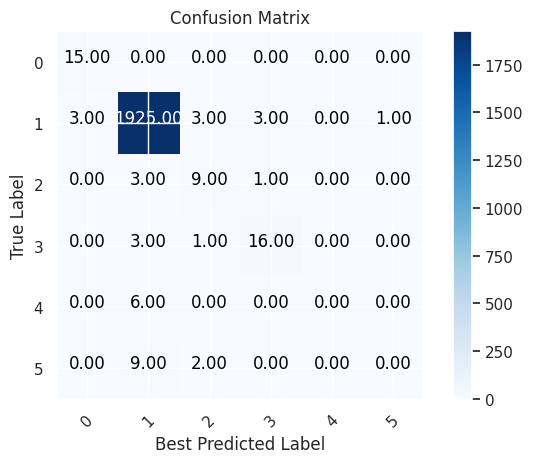

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_best are true labels and best predicted labels, respectively
cm = confusion_matrix(y_test, y_pred_best)
# Assuming classes is a list containing the class names in the order of the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ["0","1", "2", "3","4","5"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f'  # Format to display the numerical values inside the matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Best Predicted Label')
plt.tight_layout()
plt.show()

Cross-Validation

#K-Nearest Neighbor(KNN)

How KNN works
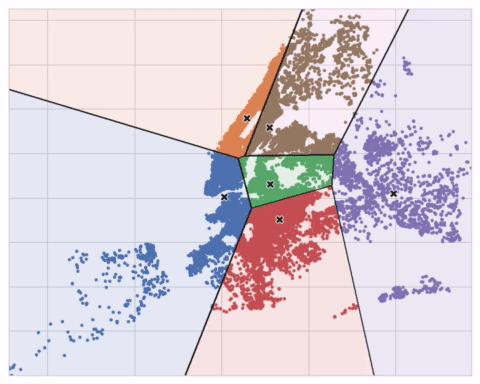

Normal Model Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have already split your dataset into X_train, X_test, y_train, and y_test

# K-nearest neighbor classifier with k=5 (you can change the value of n_neighbors as needed)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Calculate training accuracy
knn_train = round(knn.score(X_train, y_train) * 100, 4)

# Calculate model accuracy score
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 4)

print("Training Accuracy    :", knn_train, "%")
print("Model Accuracy Score :", knn_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 97.075 %
Model Accuracy Score : 96.85 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.97      1.00      0.98      1935
           2       0.33      0.08      0.12        13
           3       0.75      0.15      0.25        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.97      2000
   macro avg       0.34      0.20      0.23      2000
weighted avg       0.95      0.97      0.96      2000

--------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Hyperparameter tuning of KNN using GridSearchCV

In [ ]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Step 2: Define hyperparameters and their values to search over
param_grid = {
    'n_neighbors': [3, 5, 7],        # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2],                     # Power parameter for the Minkowski distance metric
}

# Step 3: Create an instance of GridSearchCV for KNN
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Step 4: Fit the GridSearchCV instance on the training data and measure time
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time

# Step 5: Print the best hyperparameters and corresponding accuracy score
best_params = grid_search.best_params_
best_accuracy = round(grid_search.best_score_ * 100, 4)

print("\033[1m--------------------------------------------------------\033[0m")
print("Best Hyperparameters:", best_params)
print("Best Accuracy Score :", best_accuracy, "%")
print("Total Time Taken    :", round(total_time, 4), "seconds")
print("\033[1m--------------------------------------------------------\033[0m")

# Refit the model on the full training data using the best hyperparameters and measure time
best_knn = grid_search.best_estimator_
start_time = time.time()
best_knn.fit(X_train, y_train)

# Evaluate the model on the test data and measure time
y_pred_best = best_knn.predict(X_test)
best_knn_accuracy = round(accuracy_score(y_pred_best, y_test) * 100, 4)
end_time = time.time()
total_time = end_time - start_time

print("Best Model Training Accuracy:", round(best_knn.score(X_train, y_train) * 100, 4), "%")
print("Best Model Test Accuracy    :", best_knn_accuracy, "%")
print("Total Time Taken for Training and Prediction:", round(total_time, 4), "seconds")
print("\033[1m--------------------------------------------------------\033[0m")
print("Best Model Classification Report: \n", classification_report(y_test, y_pred_best))
print("\033[1m--------------------------------------------------------\033[0m")


--------------------------------------------------------
Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best Accuracy Score : 96.825 %
Total Time Taken    : 2.3033 seconds
--------------------------------------------------------
Best Model Training Accuracy: 97.0375 %
Best Model Test Accuracy    : 97.0 %
Total Time Taken for Training and Prediction: 0.0964 seconds
--------------------------------------------------------
Best Model Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.07      0.12        15
           1       0.97      1.00      0.99      1935
           2       0.50      0.23      0.32        13
           3       0.75      0.15      0.25        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.97      2000
   macro avg       0.45      0.24      0.28      2000
weighted avg       0.96     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Confusion Matrix

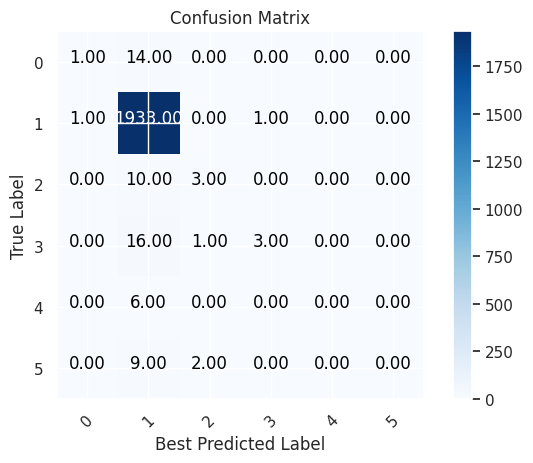

In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_best are true labels and best predicted labels, respectively
cm = confusion_matrix(y_test, y_pred_best)
# Assuming classes is a list containing the class names in the order of the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ["0","1", "2", "3","4","5"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f'  # Format to display the numerical values inside the matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Best Predicted Label')
plt.tight_layout()
plt.show()

Cross-Validation

In [ ]:
#  Create the KNN model with the best parameters
best_params = {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                             p=best_params['p'],
                             weights=best_params['weights'])

# Perform cross-validation and get predictions
num_folds = 5
predicted_labels = cross_val_predict(model, X_train, y_train, cv=num_folds)

# Calculate evaluation metrics
accuracy = accuracy_score(y_train, predicted_labels)
precision = precision_score(y_train, predicted_labels, average='weighted')
recall = recall_score(y_train, predicted_labels, average='weighted')
f1 = f1_score(y_train, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(y_train, predicted_labels)

print("\033[1m--------------------------------------------------------\033[0m")
print(f"Cross-validated Accuracy: {accuracy}")
print(f"Cross-validated Precision: {precision}")
print(f"Cross-validated Recall: {recall}")
print(f"Cross-validated F1-score: {f1}")
print("\033[1m--------------------------------------------------------\033[0m")
print("Confusion Matrix:")
print(conf_matrix)

# Train the model on the entire training set and test it on the test set
model.fit(X_train, y_train)
test_predictions = model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')
test_conf_matrix = confusion_matrix(y_test, test_predictions)

print("\033[1m--------------------------------------------------------\033[0m")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1-score: {test_f1}")
print("\033[1m--------------------------------------------------------\033[0m")
print("Test Confusion Matrix:")
print(test_conf_matrix)
print("\033[1m--------------------------------------------------------\033[0m")

--------------------------------------------------------
Cross-validated Accuracy: 0.96825
Cross-validated Precision: 0.9533522367296019
Cross-validated Recall: 0.96825
Cross-validated F1-score: 0.9575651304644048
--------------------------------------------------------
Confusion Matrix:
[[   2   92    3    0    0    0]
 [   4 7699    8    5    0    1]
 [   0   42   23    0    0    0]
 [   0   48    5   22    0    0]
 [   0   12    0    0    0    0]
 [   0   34    0    0    0    0]]
--------------------------------------------------------
Test Accuracy: 0.9695
Test Precision: 0.9539696779063915
Test Recall: 0.9695
Test F1-score: 0.958578213764907
--------------------------------------------------------
Test Confusion Matrix:
[[   1   14    0    0    0    0]
 [   2 1932    0    1    0    0]
 [   0   10    3    0    0    0]
 [   0   16    1    3    0    0]
 [   0    6    0    0    0    0]
 [   0    9    2    0    0    0]]
--------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#Gradient Boosting

Normal Model Training

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have already defined X_train, y_train, X_test, and y_test

# Create Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Calculate training accuracy
gb_train_accuracy = round(gb_classifier.score(X_train, y_train) * 100, 4)

# Calculate accuracy score on the test set
gb_accuracy = round(accuracy_score(y_pred_gb, y_test) * 100, 4)

print("Training Accuracy    : {:.4f}%".format(gb_train_accuracy))
print("Model Accuracy Score : {:.4f}%".format(gb_accuracy))
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_gb))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 99.8375%
Model Accuracy Score : 98.0500%
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       0.99      0.99      0.99      1935
           2       0.64      0.69      0.67        13
           3       0.68      0.65      0.67        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.98      2000
   macro avg       0.52      0.56      0.54      2000
weighted avg       0.97      0.98      0.98      2000

--------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Hyperparameter tuning of Gradient Boosting using GridSearchCV

In [ ]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

# Step 2: Define hyperparameters and their values to search over
param_grid = {
    'n_estimators': [50, 100, 200],     # Number of boosting stages to be run
    'learning_rate': [0.1, 0.01, 0.001], # Step size at each iteration
    'max_depth': [3, 5, 7]               # Maximum depth of the individual trees
}

# Step 3: Create an instance of GridSearchCV
gbc = GradientBoostingClassifier()
grid_search = GridSearchCV(gbc, param_grid, cv=5)

# Step 4: Fit the GridSearchCV instance on the training data and measure time
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time

# Step 5: Print the best hyperparameters and corresponding accuracy score
best_params = grid_search.best_params_
best_accuracy = round(grid_search.best_score_ * 100, 4)

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score :", best_accuracy, "%")
print("Total Time Taken    :", round(total_time, 4), "seconds")
print("\033[1m--------------------------------------------------------\033[0m")

# Refit the model on the full training data using the best hyperparameters and measure time
best_gbc = grid_search.best_estimator_
start_time = time.time()
best_gbc.fit(X_train, y_train)


# Evaluate the model on the test data and measure time
y_pred_best = best_gbc.predict(X_test)
best_gbc_accuracy = round(accuracy_score(y_pred_best, y_test) * 100, 4)
end_time = time.time()
total_time = end_time - start_time

print("Best Model Training Accuracy:", round(best_gbc.score(X_train, y_train) * 100, 4), "%")
print("Best Model Test Accuracy    :", best_gbc_accuracy, "%")
print("Total Time Taken for Training and Prediction:", round(total_time, 2), "seconds")
print("\033[1m--------------------------------------------------------\033[0m")
print("Best Model Classification Report: \n", classification_report(y_test, y_pred_best))
print("\033[1m--------------------------------------------------------\033[0m")


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best Accuracy Score : 98.475 %
Total Time Taken    : 1440.7564 seconds
--------------------------------------------------------
Best Model Training Accuracy: 99.925 %
Best Model Test Accuracy    : 97.95 %
Total Time Taken for Training and Prediction: 14.57 seconds
--------------------------------------------------------
Best Model Classification Report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       0.99      0.99      0.99      1935
           2       0.64      0.69      0.67        13
           3       0.72      0.65      0.68        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.98      2000
   macro avg       0.53      0.56      0.54      2000
weighted avg       0.97      0.98      0.98      2000

-----------------

Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create the Gradient Boosting model with the best parameters
best_params = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
model = GradientBoostingClassifier(learning_rate=best_params['learning_rate'],
                                   max_depth=best_params['max_depth'],
                                   n_estimators=best_params['n_estimators'])

# Perform cross-validation and get predictions
num_folds = 5
predicted_labels = cross_val_predict(model, X_train, y_train, cv=num_folds)

# Calculate evaluation metrics
accuracy = accuracy_score(y_train, predicted_labels)
precision = precision_score(y_train, predicted_labels, average='weighted')
recall = recall_score(y_train, predicted_labels, average='weighted')
f1 = f1_score(y_train, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(y_train, predicted_labels)

print("\033[1m--------------------------------------------------------\033[0m")
print(f"Cross-validated Accuracy: {accuracy}")
print(f"Cross-validated Precision: {precision}")
print(f"Cross-validated Recall: {recall}")
print(f"Cross-validated F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

# Train the model on the entire training set and test it on the test set
model.fit(X_train, y_train)
test_predictions = model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')
test_conf_matrix = confusion_matrix(y_test, test_predictions)

print("\033[1m--------------------------------------------------------\033[0m")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1-score: {test_f1}")
print("Test Confusion Matrix:")
print(test_conf_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



--------------------------------------------------------
Cross-validated Accuracy: 0.98275
Cross-validated Precision: 0.9770383556532828
Cross-validated Recall: 0.98275
Cross-validated F1-score: 0.9794714773331553
Confusion Matrix:
[[  88    7    1    1    0    0]
 [   3 7696    7    4    0    7]
 [   1   29   32    2    0    1]
 [   1   24    4   46    0    0]
 [   0   12    0    0    0    0]
 [   0   34    0    0    0    0]]
--------------------------------------------------------
Test Accuracy: 0.981
Test Precision: 0.9733978632478631
Test Recall: 0.981
Test F1-score: 0.977102140363193
Test Confusion Matrix:
[[  15    0    0    0    0    0]
 [   1 1926    2    4    0    2]
 [   0    4    8    1    0    0]
 [   2    4    1   13    0    0]
 [   0    6    0    0    0    0]
 [   0   10    1    0    0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#Anomaly Detection

In [ ]:
from sklearn.ensemble import IsolationForest

# Assuming you have already defined X_train and X_test for anomaly detection

# Create Isolation Forest model
isolation_forest = IsolationForest()

# Fit the model on the training data
isolation_forest.fit(X_train)

# Make predictions on the test set (-1: anomaly, 1: normal)
y_pred_anomaly = isolation_forest.predict(X_test)

# Convert predictions to binary format (0: anomaly, 1: normal)
y_pred_anomaly_binary = [1 if pred == 1 else 0 for pred in y_pred_anomaly]

# Calculate accuracy score for anomaly detection
anomaly_accuracy = round(accuracy_score(y_pred_anomaly_binary, y_test) * 100, 4)

print("Anomaly Detection Accuracy: {}%".format(anomaly_accuracy))


Anomaly Detection Accuracy: 73.0%


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have already defined X_train, y_train, X_test, and y_test

# Create Logistic Regression Classifier
log_reg_classifier = LogisticRegression()

# Train the model
log_reg_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg_classifier.predict(X_test)

# Calculate training accuracy
log_reg_train_accuracy = round(log_reg_classifier.score(X_train, y_train) * 100, 4)

# Calculate accuracy score on the test set
log_reg_accuracy = round(accuracy_score(y_pred_log_reg, y_test) * 100, 4)

print("Training Accuracy    :", log_reg_train_accuracy, "%")
print("Model Accuracy Score :", log_reg_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_log_reg))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 96.6625 %
Model Accuracy Score : 96.8 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.97      1.00      0.98      1935
           2       0.33      0.15      0.21        13
           3       0.75      0.15      0.25        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.97      2000
   macro avg       0.34      0.22      0.24      2000
weighted avg       0.95      0.97      0.96      2000

--------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/l

GridsearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define hyperparameters and their values to search over
param_grid = {
    'C': [0.1, 1, 10],              # Regularization parameter
    'penalty': ['l1', 'l2'],        # Regularization type ('l1' or 'l2')
    'solver': ['liblinear']         # Optimization algorithm
}

# Create an instance of GridSearchCV
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5)

# Fit the GridSearchCV instance on the training data and measure time
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time

# Print the best hyperparameters and corresponding accuracy score
best_params = grid_search.best_params_
best_accuracy = round(grid_search.best_score_ * 100, 2)

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score :", best_accuracy, "%")
print("Total Time Taken    :", round(total_time, 2), "seconds")
print("\033[1m--------------------------------------------------------\033[0m")

# Refit the model on the full training data using the best hyperparameters and measure time
best_logreg = grid_search.best_estimator_
start_time = time.time()
best_logreg.fit(X_train, y_train)


# Evaluate the model on the test data and measure time
y_pred_best = best_logreg.predict(X_test)
best_logreg_accuracy = round(accuracy_score(y_pred_best, y_test) * 100, 4)
end_time = time.time()
total_time = end_time - start_time

print("\033[1m--------------------------------------------------------\033[0m")
print("Best Model Training Accuracy:", round(best_logreg.score(X_train, y_train) * 100, 4), "%")
print("Best Model Test Accuracy    :", best_logreg_accuracy, "%")
print("Total Time Taken for Training and Prediction:", round(total_time, 2), "seconds")
print("\033[1m--------------------------------------------------------\033[0m")
print("Best Model Classification Report: \n", classification_report(y_test, y_pred_best))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: Convergen

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy Score : 97.48 %
Total Time Taken    : 68.7 seconds
--------------------------------------------------------
--------------------------------------------------------
Best Model Training Accuracy: 97.5375 %
Best Model Test Accuracy    : 97.45 %
Total Time Taken for Training and Prediction: 0.15 seconds
--------------------------------------------------------
Best Model Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.98      1.00      0.99      1935
           2       0.50      0.23      0.32        13
           3       0.88      0.70      0.78        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.97      2000
   macro avg       0.39      0.32      0.35      2000
weighted avg       0.96      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Cross-Validation





In [ ]:
# Create the Logistic Regression model with the best parameters
best_params = {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
model = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'], multi_class='auto')

#Perform cross-validation and get predictions
num_folds = 5
predicted_labels = cross_val_predict(model, X_train, y_train, cv=num_folds)

# Calculate evaluation metrics
accuracy = accuracy_score(y_train, predicted_labels)
precision = precision_score(y_train, predicted_labels, average='weighted')
recall = recall_score(y_train, predicted_labels, average='weighted')
f1 = f1_score(y_train, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(y_train, predicted_labels)

print("\033[1m--------------------------------------------------------\033[0m")
print(f"Cross-validated Accuracy: {accuracy}")
print(f"Cross-validated Precision: {precision}")
print(f"Cross-validated Recall: {recall}")
print(f"Cross-validated F1-score: {f1}")
print("\033[1m--------------------------------------------------------\033[0m")
print("Confusion Matrix:")
print(conf_matrix)

# Train the model on the entire training set and test it on the test set
model.fit(X_train, y_train)
test_predictions = model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')
test_conf_matrix = confusion_matrix(y_test, test_predictions)

print("\033[1m--------------------------------------------------------\033[0m")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1-score: {test_f1}")
print("\033[1m--------------------------------------------------------\033[0m")
print("Test Confusion Matrix:")
print(test_conf_matrix)
print("\033[1m--------------------------------------------------------\033[0m")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control 

--------------------------------------------------------
Cross-validated Accuracy: 0.97275
Cross-validated Precision: 0.9629200525240446
Cross-validated Recall: 0.97275
Cross-validated F1-score: 0.9640940057896354
--------------------------------------------------------
Confusion Matrix:
[[  13   81    3    0    0    0]
 [   3 7709    1    4    0    0]
 [   0   50   15    0    0    0]
 [   1   23    6   45    0    0]
 [   0   12    0    0    0    0]
 [   0   33    1    0    0    0]]
--------------------------------------------------------
Test Accuracy: 0.975
Test Precision: 0.9580835859861884
Test Recall: 0.975
Test F1-score: 0.965658691274159
--------------------------------------------------------
Test Confusion Matrix:
[[   0   15    0    0    0    0]
 [   0 1934    0    1    0    0]
 [   0   11    2    0    0    0]
 [   2    3    1   14    0    0]
 [   0    6    0    0    0    0]
 [   0   10    1    0    0    0]]
--------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#Deep Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your data loaded and preprocessed as X_train, y_train, X_test, y_test

# Create the deep learning model
deep_learning_model = Sequential()
deep_learning_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
deep_learning_model.add(Dropout(0.2))
deep_learning_model.add(Dense(64, activation='relu'))
deep_learning_model.add(Dropout(0.2))
deep_learning_model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
deep_learning_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
deep_learning_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_probs = deep_learning_model.predict(X_test)
y_pred_deep = (y_pred_probs > 0.5).astype(int)  # Round probabilities to get binary predictions
deep_learning_accuracy = round(accuracy_score(y_pred_deep, y_test) * 100, 4)

print("\033[1m--------------------------------------------------------\033[0m")
print("Deep Learning Model Accuracy Score :", deep_learning_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_deep))


Epoch 1/50
200/200 [==============================] - 2s 3ms/step - loss: -213.9654 - accuracy: 0.9659 - val_loss: -1142.0581 - val_accuracy: 0.9594
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: -3149.8381 - accuracy: 0.9659 - val_loss: -9787.3867 - val_accuracy: 0.9594
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: -14012.9238 - accuracy: 0.9659 - val_loss: -33017.3281 - val_accuracy: 0.9594
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: -38134.6758 - accuracy: 0.9659 - val_loss: -73669.5391 - val_accuracy: 0.9594
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: -75197.2188 - accuracy: 0.9659 - val_loss: -141066.9844 - val_accuracy: 0.9594
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: -125389.3672 - accuracy: 0.9659 - val_loss: -227238.5938 - val_accuracy: 0.9594
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: -200530.5781 - a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define a function to create the Keras model
def create_model(learning_rate=0.001, dense_units_1=128, dense_units_2=64, dropout_rate=0.2):
    deep_learning_model = Sequential()
    deep_learning_model.add(Dense(dense_units_1, input_dim=X_train.shape[1], activation='relu'))
    deep_learning_model.add(Dropout(dropout_rate))
    deep_learning_model.add(Dense(dense_units_2, activation='relu'))
    deep_learning_model.add(Dropout(dropout_rate))
    deep_learning_model.add(Dense(1, activation='sigmoid'))

    deep_learning_model.compile(optimizer=Adam(learning_rate=learning_rate),
                                loss='binary_crossentropy',
                                metrics=['accuracy'])
    return deep_learning_model

start_time = time.time()

# Create KerasClassifier
keras_classifier = KerasClassifier(build_fn=create_model, verbose=0)

# Define hyperparameters to search
param_grid = {
    'learning_rate': [0.001, 0.01],
    'dense_units_1': [64, 128],
    'dense_units_2': [32, 64],
    'dropout_rate': [0.2, 0.3]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=keras_classifier,
                           param_grid=param_grid,
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

# Perform the grid search on X_train and y_train
grid_result = grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_result.best_params_
best_model = grid_result.best_estimator_

# Evaluate the best model on the test set
start_time1 = time.time()
y_pred_probs = best_model.predict(X_test)
y_pred_deep = (y_pred_probs > 0.5).astype(int)
deep_learning_accuracy = round(accuracy_score(y_pred_deep, y_test) * 100, 4)
end_time = time.time()
total_time = end_time - start_time
total_time_pre = end_time - start_time1
print("Total Time Taken:", round(total_time, 2), "seconds")

print("\033[1m--------------------------------------------------------\033[0m")
print("Total Time Taken for Training and Prediction:", round(total_time_pre, 2), "seconds")
print("Best Hyperparameters:", best_params)
print("Deep Learning Model Accuracy Score:", deep_learning_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report:\n", classification_report(y_test, y_pred_deep))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


<ipython-input-61-b18205600e9d>:22: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



63/63 [==============================] - 0s 1ms/step
Total Time Taken: 76.11 seconds
--------------------------------------------------------
Total Time Taken for Training and Prediction: 0.25 seconds
Best Hyperparameters: {'dense_units_1': 64, 'dense_units_2': 32, 'dropout_rate': 0.2, 'learning_rate': 0.001}
Deep Learning Model Accuracy Score: 96.75 %
--------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.97      1.00      0.98      1935
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.97      2000
   macro avg       0.16      0.17      0.16      2000
weighted avg       0.94      0.97      0.95      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Define the neural network architecture and parameters
dense_units_1 = 64
dense_units_2 = 32
dropout_rate = 0.2
learning_rate = 0.001
num_classes = len(np.unique(y))  # Number of unique classes in the target variable

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the neural network model
model = Sequential()
model.add(Dense(dense_units_1, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(dropout_rate))
model.add(Dense(dense_units_2, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with the given learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Fit the model with cross-validation
num_folds = 5
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=1/num_folds, verbose=0)

# Evaluate the model on the training set
predicted_labels = np.argmax(model.predict(X_train), axis=-1)
accuracy = accuracy_score(y_train, predicted_labels)
precision = precision_score(y_train, predicted_labels, average='weighted')
recall = recall_score(y_train, predicted_labels, average='weighted')
f1 = f1_score(y_train, predicted_labels, average='weighted')
conf_matrix = confusion_matrix(y_train, predicted_labels)

print(f"Cross-validated Accuracy: {accuracy}")
print(f"Cross-validated Precision: {precision}")
print(f"Cross-validated Recall: {recall}")
print(f"Cross-validated F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

# Evaluate the model on the test set
test_predictions = np.argmax(model.predict(X_test), axis=-1)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions, average='weighted')
test_recall = recall_score(y_test, test_predictions, average='weighted')
test_f1 = f1_score(y_test, test_predictions, average='weighted')
test_conf_matrix = confusion_matrix(y_test, test_predictions)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1-score: {test_f1}")
print("Test Confusion Matrix:")
print(test_conf_matrix)

250/250 [==============================] - 1s 2ms/step
Cross-validated Accuracy: 0.964625
Cross-validated Precision: 0.930501390625
Cross-validated Recall: 0.964625
Cross-validated F1-score: 0.9472559807851372
Confusion Matrix:
[[   0   97    0    0    0    0]
 [   0 7717    0    0    0    0]
 [   0   65    0    0    0    0]
 [   0   75    0    0    0    0]
 [   0   12    0    0    0    0]
 [   0   34    0    0    0    0]]
63/63 [==============================] - 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Test Accuracy: 0.9675
Test Precision: 0.9360562499999999
Test Recall: 0.9675
Test F1-score: 0.9515184243964423
Test Confusion Matrix:
[[   0   15    0    0    0    0]
 [   0 1935    0    0    0    0]
 [   0   13    0    0    0    0]
 [   0   20    0    0    0    0]
 [   0    6    0    0    0    0]
 [   0   11    0    0    0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

